In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

### 1. Reading Data

In [2]:
# reading data from csv file, data is separated by ;
data = pd.read_csv('/Users/mahsa/Documents/github/Lead-Conversion-Score-Prediction/Sample Data/bank-additional-full.csv', delimiter=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 2. Dataset overview

* Total Number of data points: 41188
* Number of independent/input variables: 20
* Number of dependent varibale/label: 1
* Out of 20 variables...
    - 10 categorical features [job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome]
    - 10 numerical features [age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed]
* There are no NULL values in any of the columns, some categorical variables are already filled with 'unknown' for missing values

In [4]:
# print first 5 roes of the dataset
print("First 5 rows of the dataset: ")
data.head()

First 5 rows of the dataset: 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
num_rows = data.shape[0]
print("Number of leads in dataset: ", num_rows)
conv_leads = data[data.y=='yes'].shape[0]
print("Number of leads converted:", conv_leads," which is ", (conv_leads/data.shape[0]*100),"% of total leads. ")
print(((data.shape[0]-conv_leads)/data.shape[0]*100),"% leads are not converted to customers.")

Number of leads in dataset:  41188
Number of leads converted: 4640  which is  11.265417111780131 % of total leads. 
88.73458288821988 % leads are not converted to customers.


* Data is imbalanced, only 11.3% of the total data points belongs to positive class and the remaining 88.7% data points belong to negative class. Positive class is denoted by <b><i>1</i></b> and the negative by <b><i>0</i></b> in our dataset.

In [6]:
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
num_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

### 3. Exploratory Data Analysis

#### 3.1 Univariate Analysis

In [7]:
data_p = data.loc[data.y=='yes'] # postive data instances - converted leads
data_n = data.loc[data.y=='no'] # negative data instances - not converted leads

print(data_p.shape, data_n.shape)

(4640, 21) (36548, 21)


##### 3.1.1 Univariate Analysis: Duration

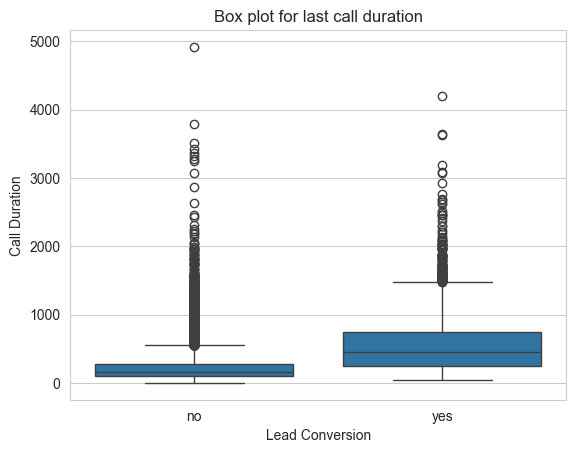

In [8]:
# box plot for call duration
sns.set_style("whitegrid")
sns.boxplot(x='y', y='duration', data=data)
plt.xlabel('Lead Conversion')
plt.ylabel('Call Duration')
plt.title('Box plot for last call duration')
plt.show()

* From the above box plot, it can be clearly observed that the rate of conversion is high if the call duration is long. There is some overlap between the both classes when call duration is low. 
* It seems there are some outliers in data in terms of call duration 

In [9]:
per = np.percentile(data.duration, 99.9)
print("99.9 percentile value for call duration: ", per)
print("Number of data points above the 99.9 percentile range: ", data[data.duration>per].shape)

99.9 percentile value for call duration:  2175.5850000000864
Number of data points above the 99.9 percentile range:  (42, 21)


* We can remove 42 rows from data while modeling as they have very high call duration than normal 

##### 3.1.2 Univariate Analysis: Age

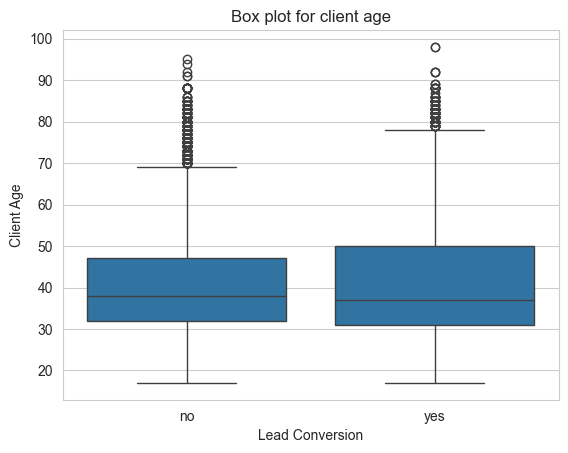

In [10]:
# box plot for age attribute
sns.set_style("whitegrid")
sns.boxplot(x='y', y='age', data=data)
plt.xlabel('Lead Conversion')
plt.ylabel('Client Age')
plt.title('Box plot for client age')
plt.show()

* From the above box plot for age attribute, Age attribute alone does not have much impact on lead conversion.

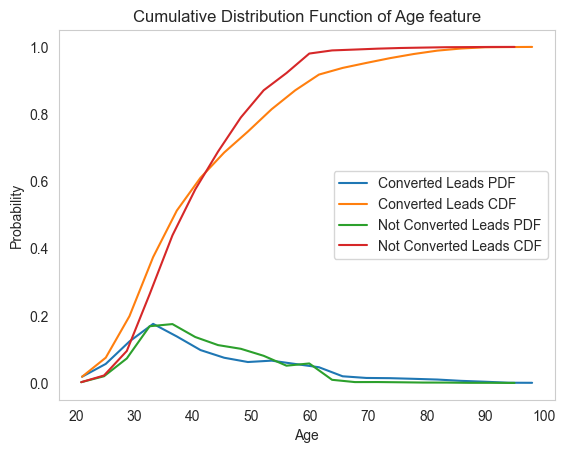

In [11]:
# plotting CDF for age feature with pyplot
counts, bin_edges = np.histogram(data_p['age'], bins=20, density = True)
pdf = counts / sum(counts)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='Converted Leads PDF')
plt.plot(bin_edges[1:], cdf, label='Converted Leads CDF')

counts, bin_edges = np.histogram(data_n['age'], bins=20, density = True)
pdf = counts / sum(counts)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='Not Converted Leads PDF')
plt.plot(bin_edges[1:],cdf, label='Not Converted Leads CDF')

plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Cumulative Distribution Function of Age feature')
plt.grid()
plt.legend()
plt.show();

# sns.displot(hsd, x="age", hue='survival_status', kind='ecdf')
# plt.show()

* From the above plot, we can observe by looking at the CDF curces, the rate of conversion is slightly decreasing as age is increasing.
* Rate of lead conversion is slighly higher in people below 40 years age, the people above 40 years.

##### 3.1.3 Univariate Analysis: Job

In [12]:
ch_d = pd.crosstab(index=data['job'], columns=data['y'])
ch_d


y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [13]:
# define a function to plot categorical variables - bar charts
# concept taken from https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/
def bar_chart(data, col1, col2='y', chart='yes', top=10):
    # chart_data = data.groupby([col1,col2]).size()
    # chart_data = chart_data.reset_index(name='count').sort_values(by=['count'], ascending=False)
    # chart_data.size()
    # print(chart_data)
    chart_data = pd.crosstab(index=data[col1], columns=data[col2])
    chart_data['total'] = chart_data['no'] + chart_data['yes']
    chart_data.sort_values(by=['total'], inplace=True, ascending=False)
    chart_data.drop('total', axis='columns', inplace=True)
    # print((chart_data))
    
    if(chart=='yes'): 
        chart_data.plot(kind='bar', figsize=(8,8), stacked=True)
        plt.xlabel(col1)
        plt.ylabel('Count')
        plt.title('% of leads converted - '+col1+' wise')
        plt.show()
    
    # print top 5 
    chart_data['conv_percent'] = chart_data['yes'] / (chart_data['no'] + chart_data['yes'])
    print(chart_data.head(top))
    
    # chart_data.plot.bar(stacked=True)    

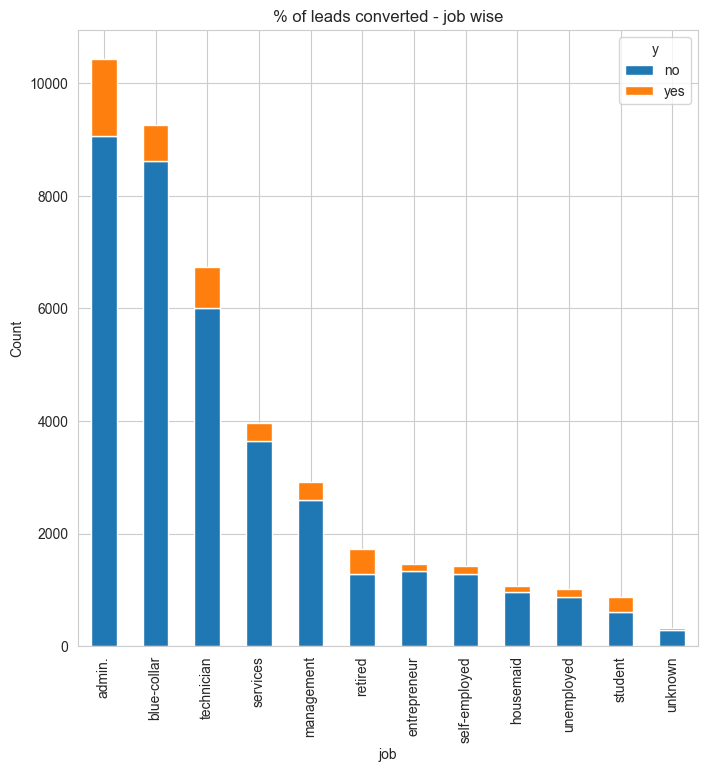

y                no   yes  conv_percent
job                                    
admin.         9070  1352      0.129726
blue-collar    8616   638      0.068943
technician     6013   730      0.108260
services       3646   323      0.081381
management     2596   328      0.112175
retired        1286   434      0.252326
entrepreneur   1332   124      0.085165
self-employed  1272   149      0.104856
housemaid       954   106      0.100000
unemployed      870   144      0.142012
student         600   275      0.314286
unknown         293    37      0.112121


In [14]:
bar_chart(data, 'job', 'y', 'yes', 15)

* It appears rate of conversion is high for people who are students and retired employees.

##### 3.1.4 Univariate Analysis: Marital

In [15]:
bar_chart(data, 'marital', 'y', 'no')

y            no   yes  conv_percent
marital                            
married   22396  2532      0.101573
single     9948  1620      0.140041
divorced   4136   476      0.103209
unknown      68    12      0.150000


* Conversion rate varies between 10% to 15% irrespective of marital status
* Conversion rate is slightly higher in people who are Single 

##### 3.1.5 Univariate Analysis: Education

In [16]:
bar_chart(data, 'education', 'y', 'no')

y                       no   yes  conv_percent
education                                     
university.degree    10498  1670      0.137245
high.school           8484  1031      0.108355
basic.9y              5572   473      0.078246
professional.course   4648   595      0.113485
basic.4y              3748   428      0.102490
basic.6y              2104   188      0.082024
unknown               1480   251      0.145003
illiterate              14     4      0.222222


* Conversion rate varies between 7% to 15% among all education qualifications, except illiterate which is very small number of instances
* Education is "unknown" for around 4% of the data points

##### 3.1.6 Univariate Analysis: default

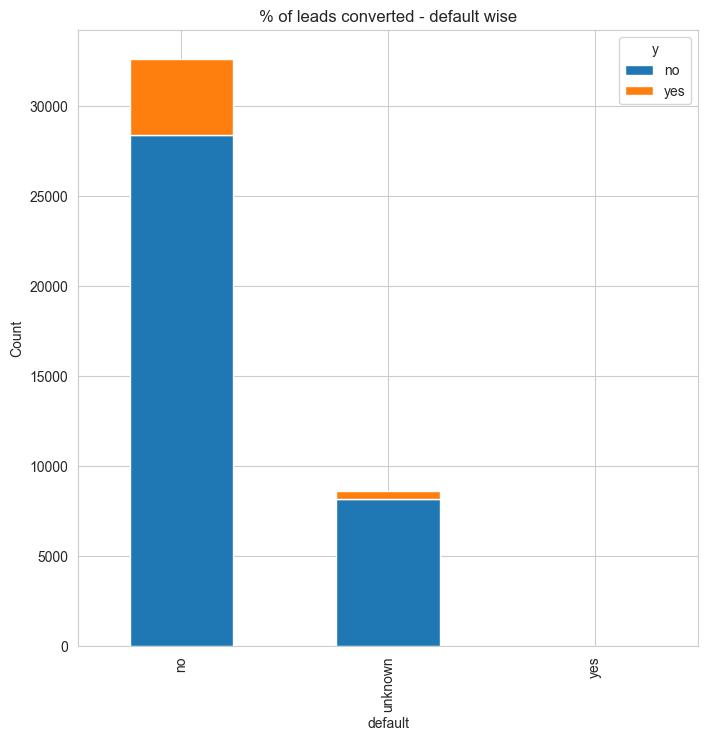

y           no   yes  conv_percent
default                           
no       28391  4197       0.12879
unknown   8154   443       0.05153
yes          3     0       0.00000


In [17]:
bar_chart(data, 'default', 'y')

* People who are not loan defaulters have highest subscription rate to term deposites
* Around 21% of the data instances having unknown default status

##### 3.1.7 Univariate Analysis: Housing

In [18]:
bar_chart(data, 'housing', 'y', 'no')

y           no   yes  conv_percent
housing                           
yes      19069  2507      0.116194
no       16596  2026      0.108796
unknown    883   107      0.108081


* Term deposite subscription rate is not much dependent on housing loan, and housing loan status is not known for 2% of the data

##### 3.1.8 Univariate Analysis: Loan

In [19]:
bar_chart(data, 'loan', 'y', 'no')

y           no   yes  conv_percent
loan                              
no       30100  3850      0.113402
yes       5565   683      0.109315
unknown    883   107      0.108081


* Term deposite subscription rate is not much dependent on personal loan status, and housing loan status is not known for 2% of the data

##### 3.1.9 Univariate Analysis: concat

In [20]:
bar_chart(data, 'contact', 'y', 'no')

y             no   yes  conv_percent
contact                             
cellular   22291  3853      0.147376
telephone  14257   787      0.052313


* Conversion rate is higher at 14% for contact type 'Celular'

##### 3.1.10 Univariate Analysis: Month

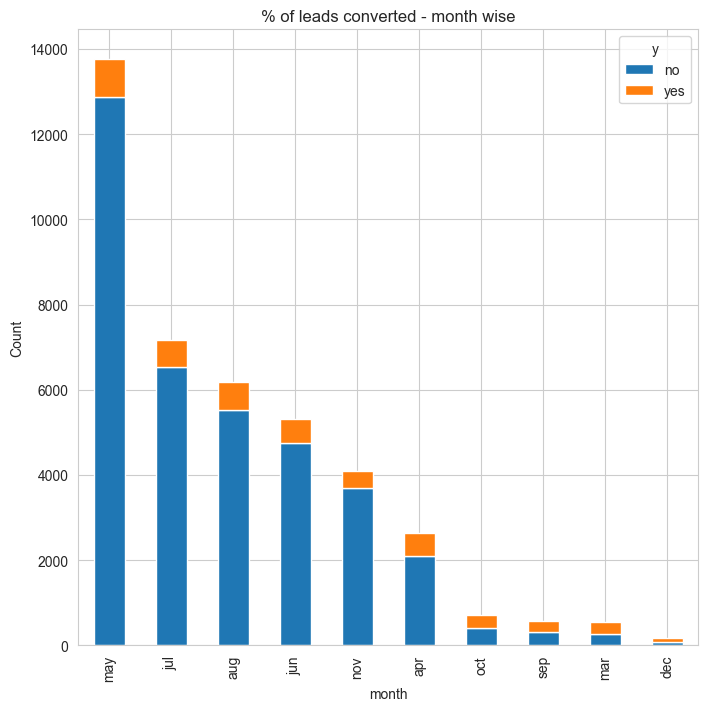

y         no  yes  conv_percent
month                          
may    12883  886      0.064347
jul     6525  649      0.090466
aug     5523  655      0.106021
jun     4759  559      0.105115
nov     3685  416      0.101439
apr     2093  539      0.204787
oct      403  315      0.438719
sep      314  256      0.449123
mar      270  276      0.505495
dec       93   89      0.489011


In [21]:
bar_chart(data, 'month', 'y')

* Number of leads are high in May, July, August, June, November and April.
* But the conversion rate much higher in March, December, September and October months though the number of leads are small.

##### 3.1.11 Univariate Analysis: day_of_week

In [22]:
bar_chart(data, 'day_of_week', 'y', 'no')

y              no   yes  conv_percent
day_of_week                          
thu          7578  1045      0.121188
mon          7667   847      0.099483
wed          7185   949      0.116671
tue          7137   953      0.117800
fri          6981   846      0.108087


* Day of week alone does not have significant impact on conversion rate

##### 3.1.12 Univariate Analysis: Campaign

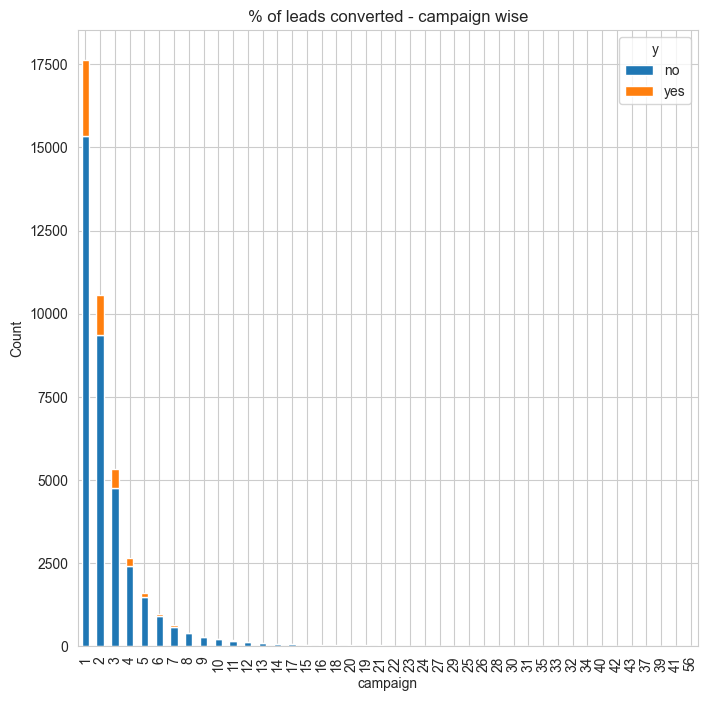

y            no   yes  conv_percent
campaign                           
1         15342  2300      0.130371
2          9359  1211      0.114570
3          4767   574      0.107471
4          2402   249      0.093927
5          1479   120      0.075047
6           904    75      0.076609
7           591    38      0.060413
8           383    17      0.042500
9           266    17      0.060071
10          213    12      0.053333
11          165    12      0.067797
12          122     3      0.024000
13           88     4      0.043478
14           68     1      0.014493
17           54     4      0.068966


In [23]:
bar_chart(data, 'campaign', 'y', 'yes', 15)

* Initial campaigns have good number of leads and also rate of conversion. 

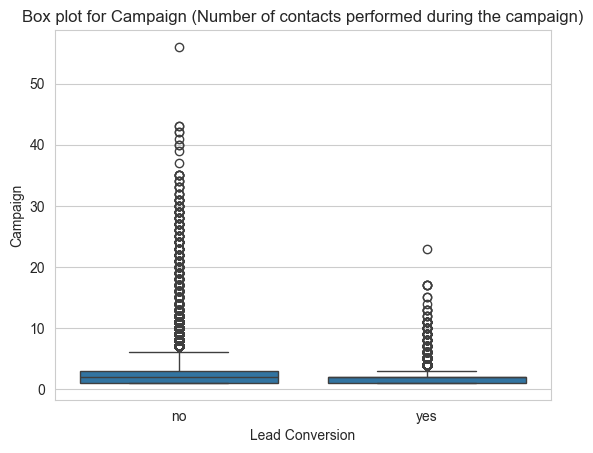

In [24]:
# box plot for campaign
sns.set_style("whitegrid")
sns.boxplot(x='y', y='campaign', data=data)
plt.xlabel('Lead Conversion')
plt.ylabel('Campaign')
plt.title('Box plot for Campaign (Number of contacts performed during the campaign)')
plt.show()

* It seems campaign is also having some outliers, let us check with percentiles

In [25]:
# remove outliers from dataset - found extreme values in call duration in 42 rows
per = np.percentile(data.campaign, 99.0)
print("99.0 percentile value for campaign: ", np.percentile(data.campaign, 99.0))
print("99.9 percentile value for campaign: ", np.percentile(data.campaign, 99.9))
print("Number of data points above the 99.0 percentile range: ", data[data.campaign > per].shape)

99.0 percentile value for campaign:  14.0
99.9 percentile value for campaign:  29.0
Number of data points above the 99.0 percentile range:  (406, 21)


* Since the value of 99.9 percentile is doubled from 99.9 percentile value, we can take 99 percentile value as cutoff and remove the 406 rows.

##### 3.1.13 Univariate Analysis: Pdays

In [26]:
bar_chart(data, 'pdays', 'y', 'no', 10)

y         no   yes  conv_percent
pdays                           
999    36000  3673      0.092582
3        141   298      0.678815
6        123   289      0.701456
4         55    63      0.533898
9         29    35      0.546875
2         24    37      0.606557
7         20    40      0.666667
12        32    26      0.448276
10        22    30      0.576923
5         17    29      0.630435


* pdays=999 : Client was not contacted previously. 96% of leads are totally new leads.
* Conversion rate is high for clients who were contacted in the previous campaigns but the number of leads are very small in that category 

##### 3.1.13 Univariate Analysis: Previous

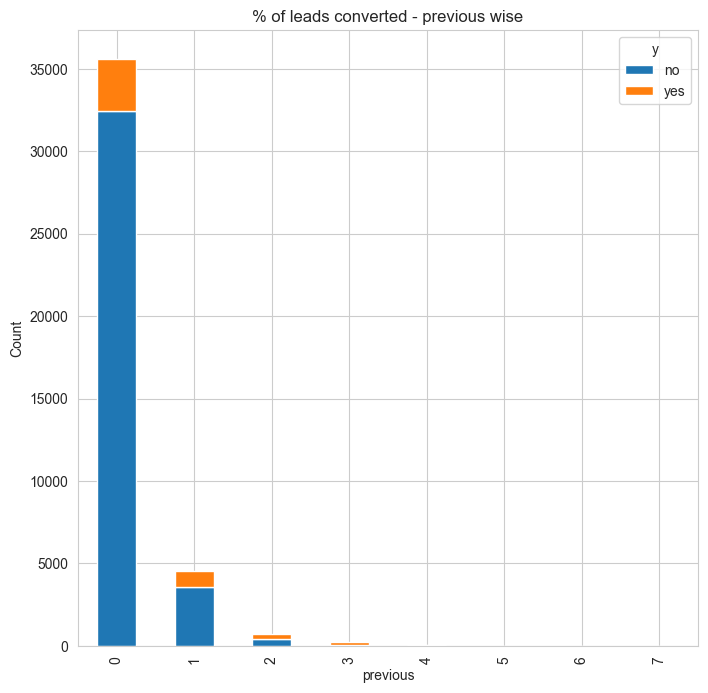

y            no   yes  conv_percent
previous                           
0         32422  3141      0.088322
1          3594   967      0.212015
2           404   350      0.464191
3            88   128      0.592593
4            32    38      0.542857
5             5    13      0.722222
6             2     3      0.600000
7             1     0      0.000000


In [27]:
bar_chart(data, 'previous', 'y', 'yes', 10)

* 86% of the people were not contacted in previous campaigns
* Conversion rate is increasing with the number of contacts increasing in previous campaigns

##### 3.1.13 Univariate Analysis: Poutcome

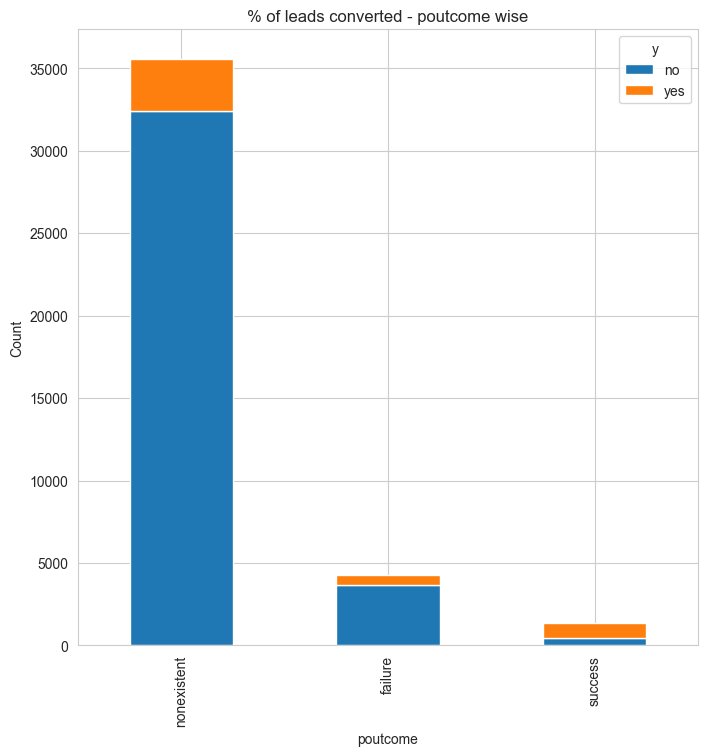

y               no   yes  conv_percent
poutcome                              
nonexistent  32422  3141      0.088322
failure       3647   605      0.142286
success        479   894      0.651129


In [28]:
bar_chart(data, 'poutcome', 'y', 'yes', 10)

* 86% of the people were not contacted in previous campaigns

#### 3.2 Bivariate Analysis

##### 3.2.1 Correlation Matrix for numerical features

In [29]:
""" For better computations we replace the label data in 'y' column, replace 'yes' to 1 and 'no' to 0 """
data.loc[data.y=='yes', 'y'] = 1
data.loc[data.y=='no', 'y'] = 0
data.y = data.y.astype(np.int64)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [30]:
data.y.unique()

array([0, 1])

In [31]:
num_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [32]:
features = num_features.copy()
features.append('y')
corr_table = data[features].corr()
#corr_table['y'].sort_values(by = 'age' , ascending=False)
# print(corr_table['y'].sort_values(ascending=False))

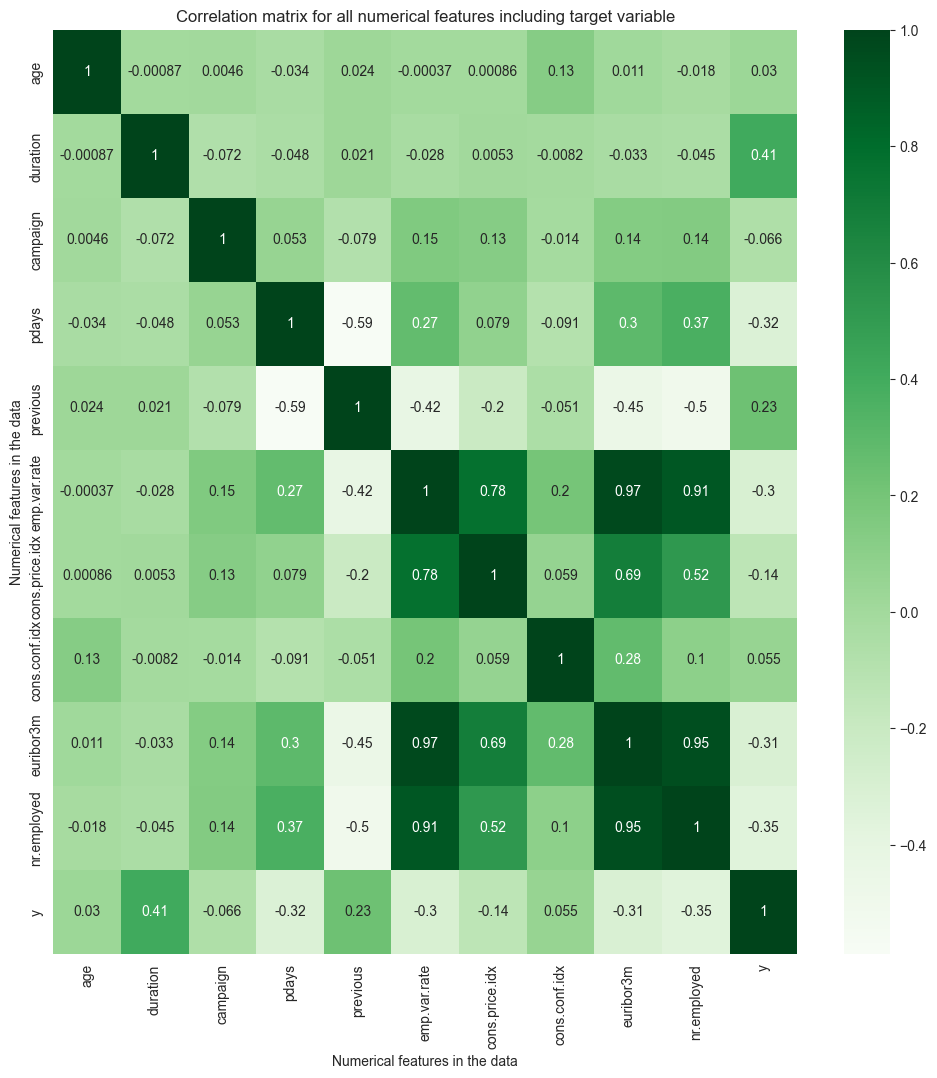

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_table, annot=True, cmap='Greens')
plt.title('Correlation matrix for all numerical features including target variable')
plt.xlabel('Numerical features in the data')
plt.ylabel('Numerical features in the data')
plt.show()

* From the above correlation table for numerical features, following are the observations...
    * "emp.var.rate" and "euribor3m" are highly correlated
    * "euribor3m" and "nr.employed" are highly correlated
    * So from the above 2 statements, euribor3m and nr.employed are highly correlated. We can ignore any of the 2 variables while training since there will not be significant difference in performance.
    
    * Varibales like duration, previous are positively correlated with target variable
    * Variables nr.employed, pdays, euribor3m and emp.var.rate are negatively correlated with target variable

##### 3.2.2 Correlation matrix for categorical features

In [34]:
pd.crosstab(data['job'], data['marital'])

marital,divorced,married,single,unknown
job,,,,
admin.,1280,5253,3875,14
blue-collar,728,6687,1825,14
entrepreneur,179,1071,203,3
housemaid,161,777,119,3
management,331,2089,501,3
retired,348,1274,93,5
self-employed,133,904,379,5
services,532,2294,1137,6
student,9,41,824,1


In [35]:
pd.crosstab(data['job'], data['marital']).shape

(12, 4)

In [36]:
# concept: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
# code reference: https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
import scipy.stats as ss

def cramers_v(f1, f2):
    conf_matrix = pd.crosstab(data[f1], data[f2])
    n = conf_matrix.values.sum()
    # chi2_cintigency returns 4 values... 0 -> chi2 value, 1 -> p-value, 2 -> degree of freedom and 3 -> expected values
    chi2 = ss.chi2_contingency(conf_matrix.values)[0]
    # print(chi2)
    phi2 = chi2/n
    # print(phi2)
    r,k = conf_matrix.shape
    # print(r,k)
    phi2corr = max(0, phi2 - ((r-1)*(k-1))/(n-1))
    # print(phi2corr)
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)

    # formula for crams-v
    crams_v = np.sqrt(phi2corr / min((r_corr-1), (k_corr-1)))
    # print(crams_v)
    return crams_v

In [37]:
# list all categorical varibales and include targe variable also
cat_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

corr_cat = np.zeros((len(cat_variables), len(cat_variables)))
for idx1, var1 in enumerate(cat_variables):
    for idx2, var2 in enumerate(cat_variables):
        corr_cat[idx1, idx2] = cramers_v(var1, var2)

# creating data frame with correlation matrix
corr_cat = pd.DataFrame(corr_cat, index=cat_variables, columns=cat_variables)

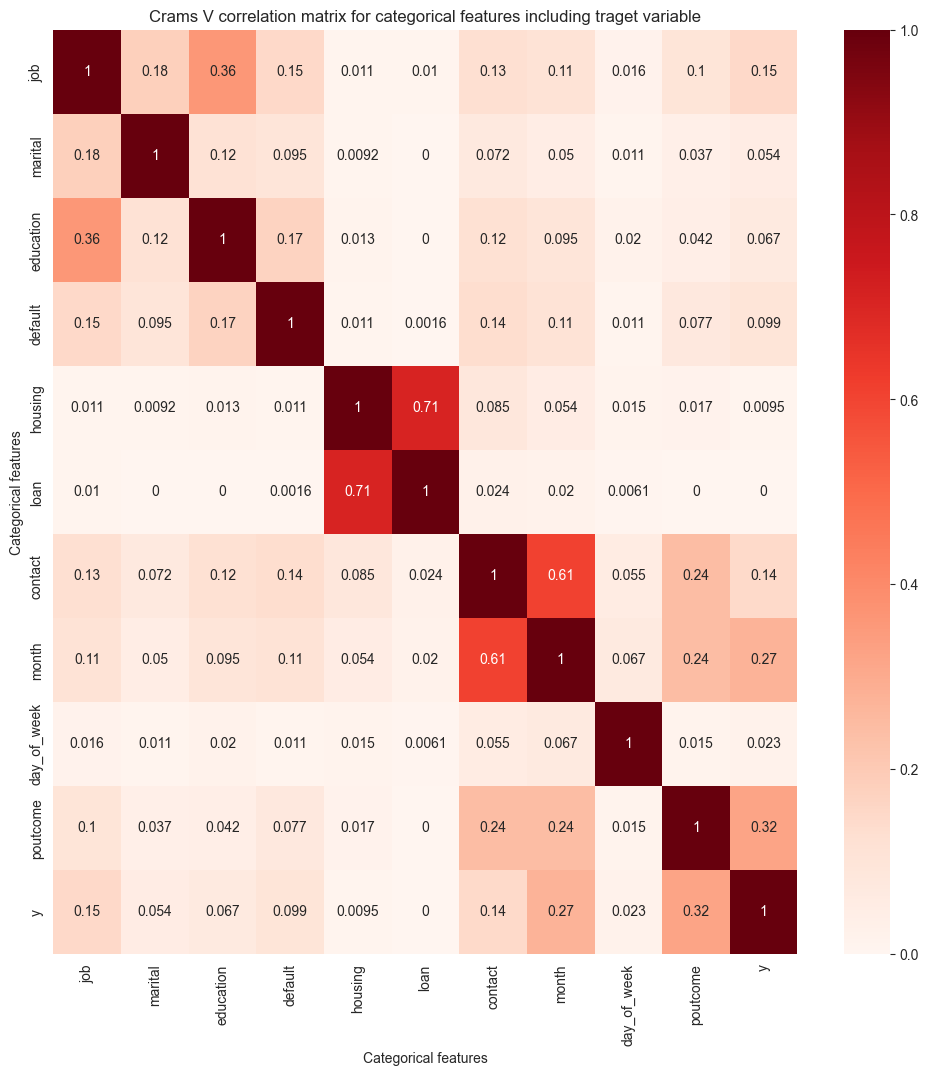

In [38]:
# print(corr_cat)
plt.figure(figsize=(12,12))
sns.heatmap(corr_cat, annot=True, cmap='Reds')
plt.title('Crams V correlation matrix for categorical features including traget variable')
plt.xlabel('Categorical features')
plt.ylabel('Categorical features')
plt.show()

* Interpretations from the above correlation matrix for categorical variables...
    * Housing and Loan are moderately associated with each other
    * Contact and Month are moderately associated with each other
    * poutcome (outcome of the previous marketing campaign), month (last contact month), job and contact (contact communication type) are highly associated with the target variable.

### 4. Data Cleaning

In [39]:
# remove outliers from dataset - found extreme values in call duration in 42 rows
per = np.percentile(data.duration, 99.9)
print("Number of data points above the 99.9 percentile range: ", data[data.duration > per].shape)
data = data[data.duration <= per] # remove the rows with call duration values greater than 99.9 percentile value
print("Dataset shape after removing the outliers from call duration: ", data.shape)

Number of data points above the 99.9 percentile range:  (42, 21)
Dataset shape after removing the outliers from call duration:  (41146, 21)


In [40]:
# remove outliers from dataset - found extreme values in campaign in 406 rows
per = np.percentile(data.campaign, 99.0)
print("Number of data points above the 99.0 percentile range: ", data[data.campaign > per].shape)
data = data[data.campaign <= per] # remove the rows with call duration values greater than 99.9 percentile value
print("Dataset shape after removing the outliers from campaign: ", data.shape)

Number of data points above the 99.0 percentile range:  (406, 21)
Dataset shape after removing the outliers from campaign:  (40740, 21)


In [41]:
data.shape[0]/num_rows

0.9891230455472467

* 98.9% of original dataset is retained for modeling
* Since emp.var.rate, euribor3m and nr.eployed are having high correlation coefficents, here we are ignoring emp.var.rate and euribor3m and keeping only nr.employed. It is having high negative correlation with target vriable compare to other 2 variables.
* In categorical variables, job and education are highly associated with each other and education has very less impact on target variable. Ignoring education variable also.

In [42]:
data.drop(['emp.var.rate','euribor3m'], axis=1, inplace=True)
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'y'],
      dtype='object')

In [43]:
num_features.remove('emp.var.rate')
num_features.remove('euribor3m')
print(cat_features, '\n',num_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'] 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']


In [44]:
# convert all values to lower case for all categorical variables
for feature in cat_features:
    data[feature] = data[feature].str.lower()
    # When converting categorical features using one hot encoding / multiple columns are being named with same feature name
    # which is not allowed in ensembles like xgboost, catboost and lgbm
    data.loc[data[feature]=='unknown', feature] = feature+'_unknown'
    data.loc[data[feature]=='no', feature] = feature+'_no'
    data.loc[data[feature]=='yes', feature] = feature+'_yes'    

### 5. Data Preprocessing

#### 5.1 Train - Test split

In [45]:
data.to_csv('data.csv')

In [46]:
data = pd.read_csv('data.csv')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('y', axis=1), data.y.values, stratify=data.y, test_size=0.2, random_state=10)

print("Train data shape: ", X_train.shape, y_train.shape)
print("Test data shape: ",X_test.shape, y_test.shape)

Train data shape:  (32592, 19) (32592,)
Test data shape:  (8148, 19) (8148,)


/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


#### 5.2 Data transformation

##### 5.2.1 Numerical features scaling

In [48]:
scaler = StandardScaler()
scaler = scaler.fit(data[num_features])

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [49]:
# creating new empty dataframes to store processed data for training
X_train_processed = X_train.drop(cat_features, axis=1)
X_test_processed = X_test.drop(cat_features, axis=1)
X_train_processed.columns

Index(['Unnamed: 0', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'cons.price.idx', 'cons.conf.idx', 'nr.employed'],
      dtype='object')

In [50]:
X_train_processed.reset_index(drop=True, inplace=True)
X_test_processed.reset_index(drop=True, inplace=True)

In [51]:
# transform all numerical features and save it new dataframes
X_train_processed[num_features] = scaler.transform(X_train[num_features])
X_test_processed[num_features] = scaler.transform(X_test[num_features])

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

##### 5.2.2 Categorical feature tranformation

* We will tranform categorical features using onehot encoder

In [52]:
onehotencoder = OneHotEncoder(handle_unknown='ignore')
cat_features_ohe = onehotencoder.fit(X_train[cat_features])

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Che

In [53]:
X_train_ohe = cat_features_ohe.transform(X_train[cat_features])
X_test_ohe = cat_features_ohe.transform(X_test[cat_features])

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Che

In [54]:
X_train_ohe.toarray().shape

(32592, 52)

In [55]:
cat_feature_labels_ohe = np.concatenate(cat_features_ohe.categories_).ravel().tolist()

In [56]:
X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=cat_feature_labels_ohe)
X_test_ohe = pd.DataFrame(X_test_ohe.toarray(), columns=cat_feature_labels_ohe)

In [57]:
print("shape of categorical features of train and test sets after converting categorical features with one hot encoding:")
X_train_ohe.shape, X_test_ohe.shape

shape of categorical features of train and test sets after converting categorical features with one hot encoding:


((32592, 52), (8148, 52))

##### 5.2.3 Merging transformed numerical features and categorical features

In [58]:
X_train_final = pd.concat([X_train_ohe, X_train_processed], axis=1)
X_test_final = pd.concat([X_test_ohe, X_test_processed], axis=1)

print("Final processed train data and test data shapes: ")
print(X_train_final.shape, X_test_final.shape)

Final processed train data and test data shapes: 
(32592, 61) (8148, 61)


In [59]:
# X_train_final.to_csv('X_train_final.csv') #, index=False
# X_test_final.to_csv('X_test_final.csv') #, index=False

### 6. Modeling

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import confusion_matrix

#### 6.1 Logistic Regression

In [61]:
lr = LogisticRegression(random_state=10, max_iter=1000) #, max_iter=500

model = lr.fit(X_train_final, y_train)

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


#### 6.2 Performance Analysis - Confusion matrix, Accuracy, AUC, F1 Score, LIFT

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

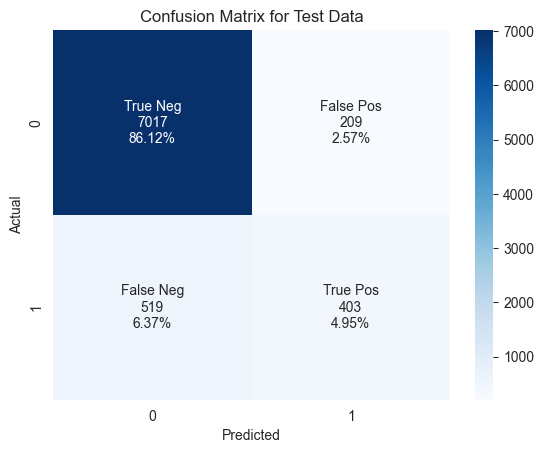

In [68]:

# print confusion matrix
y_train_pred = model.predict(X_train_final)
y_test_pred = model.predict(X_test_final)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# code reference - https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix_test.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix_test.flatten()/np.sum(confusion_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix_test, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix for Test Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [63]:
tn, fp, fn, tp = confusion_matrix_test.flatten()
print("Model Accuracy: ", ((tp + tn)/ (tn + fp + fn + tp)))

Model Accuracy:  0.9106529209621993


/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

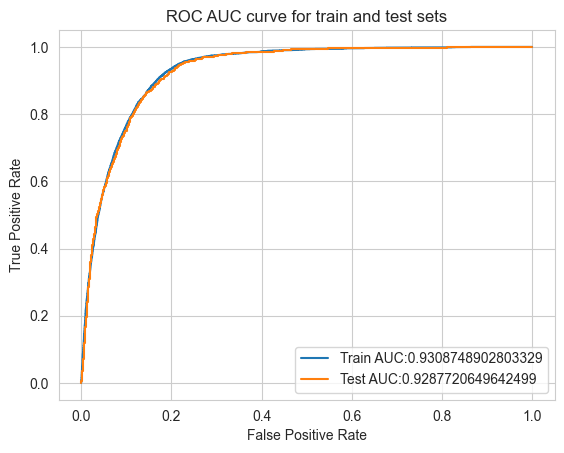

In [64]:
# AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve.
y_train_pred_prob = model.predict_proba(X_train_final) # taking only predictions for positive class
y_test_pred_prob = model.predict_proba(X_test_final) # taking only predictions for positive class

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred_prob[:, 1])
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred_prob[:, 1])

plt.plot(train_fpr, train_tpr, label='Train AUC:'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test AUC:'+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC curve for train and test sets')
plt.legend()
plt.show()


In [65]:
precision, recall, f1_beta, support = precision_recall_fscore_support(y_test, y_test_pred) #, average='micro'
print('Precision Score for class-0:', precision[0], 'and class-1: ', precision[1])
print('-'*100)
print('Recall Score for class-0:', recall[0], 'and class-1:', recall[1])
print('-'*100)
print('F1 Score for class-0:', f1_beta[0], 'and class-1:', f1_beta[1])
# print('Support: ', support)

Precision Score for class-0: 0.9311305732484076 and class-1:  0.6584967320261438
----------------------------------------------------------------------------------------------------
Recall Score for class-0: 0.971076667589261 and class-1: 0.4370932754880694
----------------------------------------------------------------------------------------------------
F1 Score for class-0: 0.9506841891342637 and class-1: 0.5254237288135593


In [66]:
##We can see the precision, recall and F1 scores in the above image. Since our focus is recall value for the positive class, base line model has given us the recall value of 54%. It means around 46% of the actual positive instances have been predicted as negative instances. We are missing almost half of the leads from the actual positive leads who are having higher conversion chance.

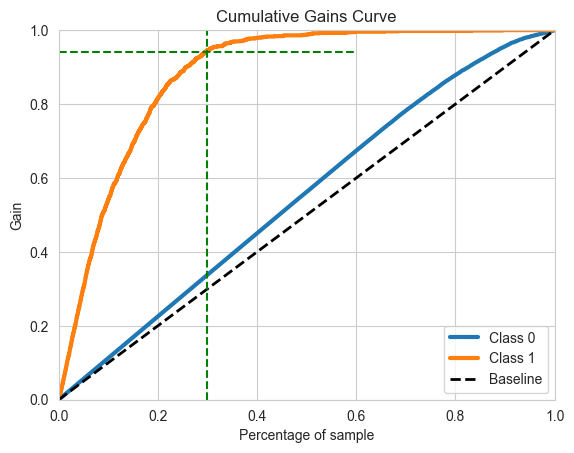

In [71]:
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
plot_cumulative_gain(y_test, y_test_pred_prob)
plt.vlines(x=0.3, ymax=1, ymin=0, colors='g', linestyles='--')
plt.hlines(y=0.94, xmax=0.6, xmin=0, colors='g', linestyles='--')
plt.show()
# plot_lift_curve(y_test, y_test_pred_prob)

* From the above cumulative gain curve...
    * Orange curve represents the cumulative gain for positive class.
    * A green horizontal and vertical dashed lines are plotted to denote the point where gain curve begins to platue
    * This intersection point tells us, with only 30% of the leads we can acheive 94% of the conversion rate.

##### The below snippet is taken to cross check whether the above cumulative gain plot is giving the same result as this gain curve

In [ ]:
decile_df = pd.DataFrame(list(zip(np.hstack((y_train,y_test)), np.hstack((y_train_pred_prob[:, 1],y_test_pred_prob[:, 1])))), columns=['y_true','y_pred'])

In [ ]:
# this piece of code taken from 
# https://medium.com/the-innovation/lead-conversion-score-prediction-using-python-a65d5bb7ccff
# to learn and understand the concept of lift curve analysis


decile_df['decile'] = pd.qcut(decile_df.y_pred, 10, labels=np.arange(10,0,-1))

lift_df = decile_df.groupby('decile')['y_pred'].count().reset_index()

lift_df.rename({'y_pred':'total'}, axis=1, inplace=True)

lift_df_pred = decile_df[decile_df.y_true==1].groupby('decile')['y_true'].count().reset_index()

lift_df_final = lift_df.merge(lift_df_pred, on='decile')

lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

lift_df_final['cumresp'] = lift_df_final.y_true.cumsum()

lift_df_final['gain'] = (lift_df_final['cumresp']/sum(lift_df_final['y_true'])) * 100

lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int') * (100/10))

In [ ]:
lift_df_final

,decile,total,y_true,cumresp,gain,cumlift
9,1,4074,2527,2527,54.827511,5.482751
8,2,4074,1298,3825,82.989803,4.149490
7,3,4074,542,4367,94.749403,3.158313
6,4,4074,151,4518,98.025602,2.450640
5,5,4074,38,4556,98.850076,1.977002
4,6,4074,31,4587,99.522673,1.658711
3,7,4074,13,4600,99.804730,1.425782
2,8,4074,4,4604,99.891517,1.248644
1,9,4074,4,4608,99.978303,1.110870
0,10,4074,1,4609,100.000000,1.000000


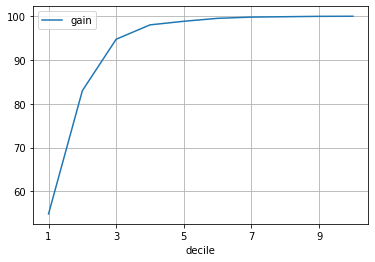

In [ ]:
lift_df_final.plot.line(x='decile', y='gain')
plt.grid()
plt.show()

* The above curve also showing the same gain rate as the cumulative curve which was drwan using scikit-plot